In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN


def apply_svm_no_intercept(svm, X):
    dec_func = svm.decision_function(X) - svm.intercept_
    return np.sign(dec_func)


# FunÃ§Ã£o auxiliar para plotar regiÃ£o de decisÃ£o
def plot_decision_boundary(clf, X, y, h=0.01, pad=0.05):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.scatter(X[y == -1, 0], X[y == -1, 1], s=70, c="blue", label=-1)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], s=70, c="orange", label=1)
    if 0 in y:
        plt.scatter(X[y == 0, 0], X[y == 0, 1], s=70, c="blue", label=-1)

    if type(clf) == SVC:
        Z = apply_svm_no_intercept(clf, np.c_[xx.ravel(), yy.ravel()])
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c="w", marker="*", s=21, linewidths=1)
        print("Numbero de vetores de suporte: ", clf.support_.size)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


n = 100  # NÃºmero de pontos por classe
d = 2  # DimensÃ£o
k = 2  # NÃºmero de classes

X = np.zeros((n * k, d))
y = np.zeros(n * k)

r = np.linspace(0.0, 1, n)  # Raio

np.random.seed(42)

for j in range(k):
    ind = range(n * j, n * (j + 1))
    t = np.linspace(j * 4, (j + 1) * 4, n) + np.random.randn(n) * 0.4  # Theta
    X[ind] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ind] = j

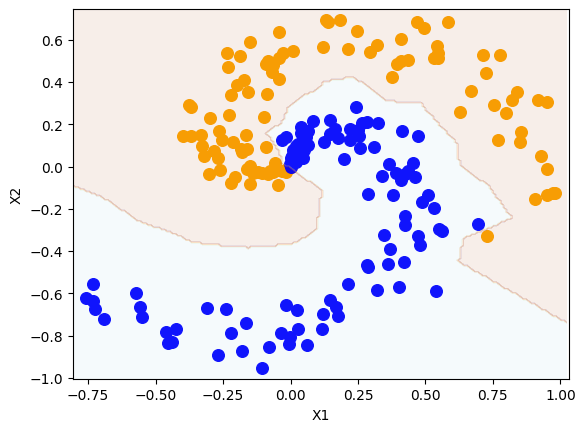

In [52]:
knn = KNN(n_neighbors=1)
knn.fit(X, y)
plot_decision_boundary(knn, X, y)

Numbero de vetores de suporte:  120


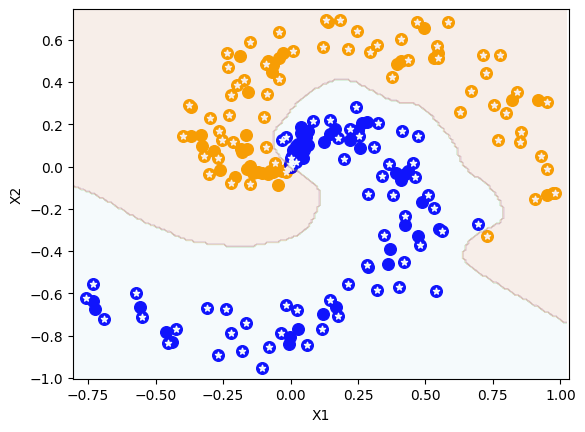

In [ ]:
g_list = [1, 5, 100]

#g = g_list[0]
#g = g_list[1]
#g = g_list[2]
svm = SVC(C=1, kernel="rbf", gamma=g, random_state=42)

svm.fit(X, y)

plot_decision_boundary(svm, X, y)

### Como podemos notar, a relação entre o gamma do SVM e o k do kNN indica que essas variáveis, em relação aos seus respectivos modelos, são inversamente proporcionais. Enquanto o aumento do gamma no svm garante maior flexibilidade ao modelo introduzindo vies, o aumento do k no kNN reduz essa flexiblidade diminuindo o vies. Ao avaliarmos o kNN com k=1 (ou seja, o kNN mais flexível possível de se obter), verificamos que sua fronteira de decisão é extremamente proxima a do SVM com gamma = 100. Tais constatações também confirmam o resultado encontrado no item anterior, onde fazendo gamma -> inf, geramos um modelo extremamente flexível que só prevê a classe de um ponto a partir da amostra de treino mais proxima a esse ponto. Além disso, quando fizemos gamma -> 0, geramos um modelo pouco flexível que basicamente classificava o ponto de acordo com a classificação da maioria das amostras.